In [10]:
# dataset source: http://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

## Dataset Information:

To demonstrate the RFMTC marketing model (a modified version of RFM), this study 
adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City 
in Taiwan. The center passes their blood transfusion service bus to one 
university in Hsin-Chu City to gather blood donated about every three months. To 
build a FRMTC model, we selected 748 donors at random from the donor database. 
These 748 donor data, each one included R (Recency - months since last 
donation), F (Frequency - total number of donation), M (Monetary - total blood 
donated in c.c.), T (Time - months since first donation), and a binary variable 
representing whether donated blood (1 stand for donating 
blood; 0 stands for not donating blood).

-----------------------------------------------------

Attribute Information:

Given is the variable name, variable type, the measurement unit and a brief 
description. The "Blood Transfusion Service Center" is a classification problem. 
The order of this listing corresponds to the order of numerals along the rows of 
the database.

R (Recency - months since last donation),  
F (Frequency - total number of donation),  
M (Monetary - total blood donated in c.c.),  
T (Time - months since first donation),   
D (Binary variable representing whether he/she donated blood)


In [407]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import xgboost

warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [408]:
df = pd.read_csv('transfusion.csv')

In [409]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   donated blood          748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [411]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated blood
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


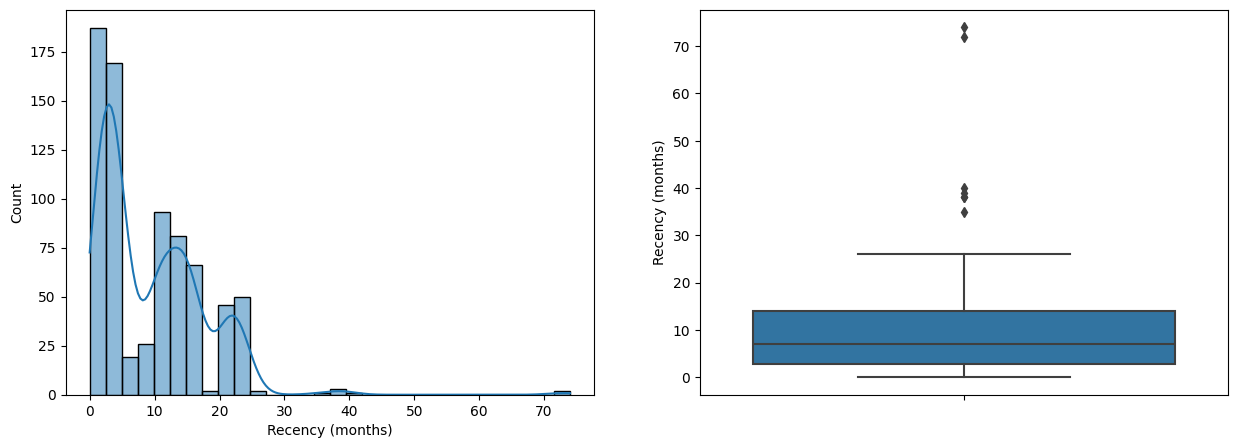

In [412]:
# Checking feature distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data = df, x = 'Recency (months)', kde = True, ax=ax1)
sns.boxplot(data=df, y='Recency (months)', ax=ax2)

plt.show()

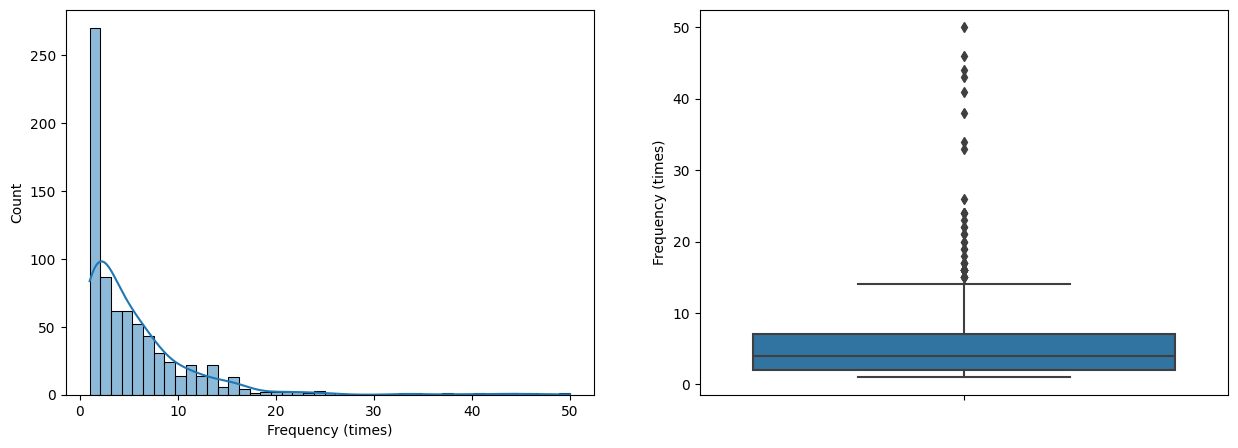

In [413]:
# Checking feature distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data = df, x = 'Frequency (times)', kde = True, ax=ax1)
sns.boxplot(data=df, y = 'Frequency (times)', ax=ax2)

plt.show()

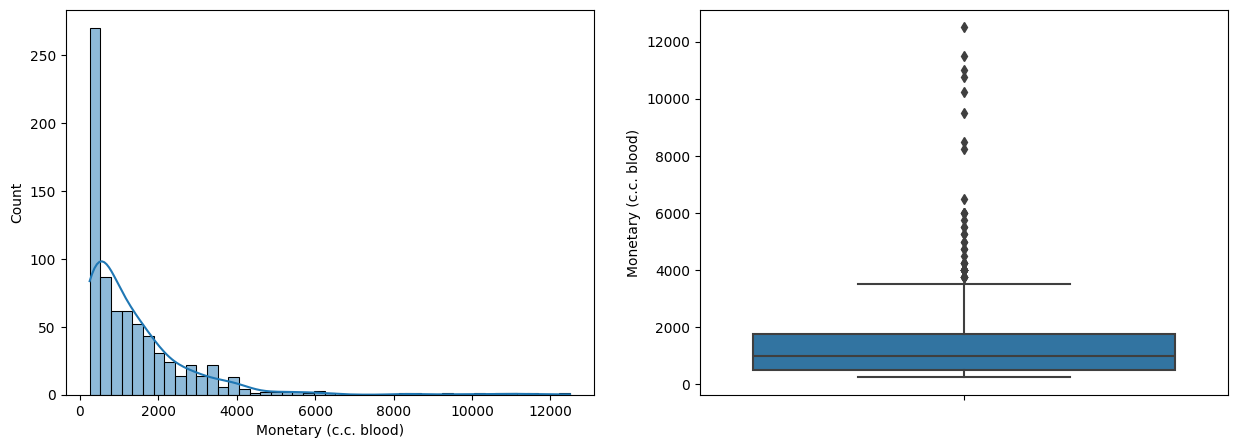

In [414]:
# Checking feature distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data = df, x = 'Monetary (c.c. blood)', kde = True, ax=ax1)
sns.boxplot(data=df, y = 'Monetary (c.c. blood)', ax=ax2)

plt.show()

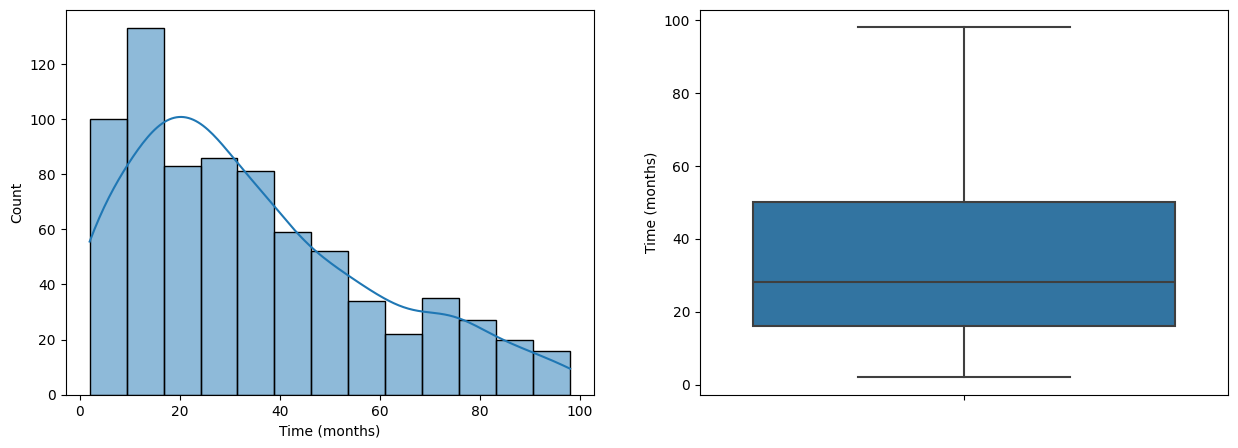

In [415]:
# Checking feature distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data = df, x = 'Time (months)', kde = True, ax=ax1)
sns.boxplot(data=df, y = 'Time (months)', ax=ax2)


plt.show()

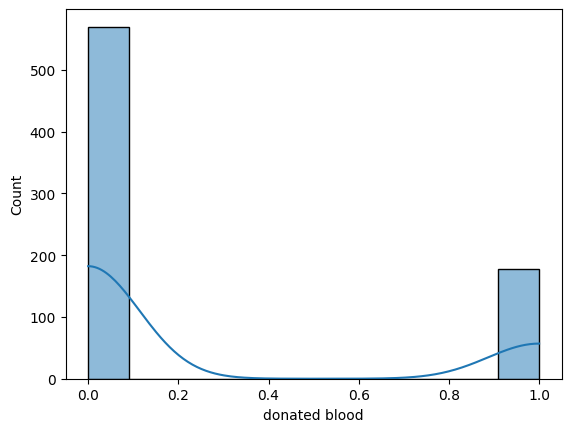

In [416]:
# Checking feature distribution

sns.histplot(data = df, x = 'donated blood', kde = True)

plt.show()

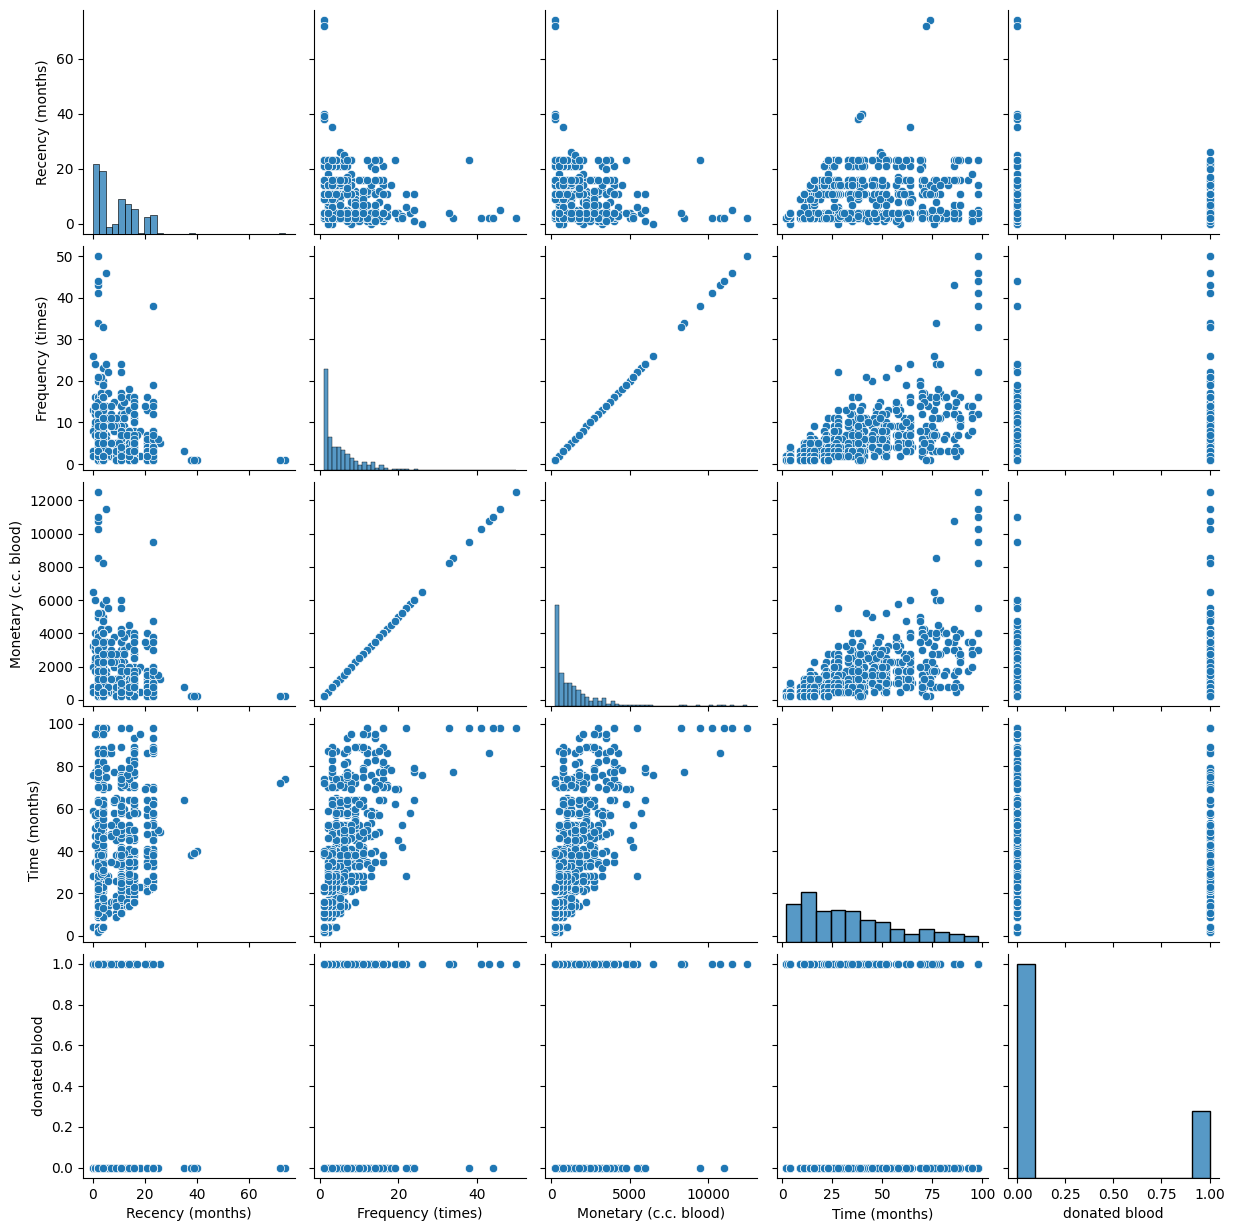

In [417]:
# Checking correlation

sns.pairplot(df)

plt.show()

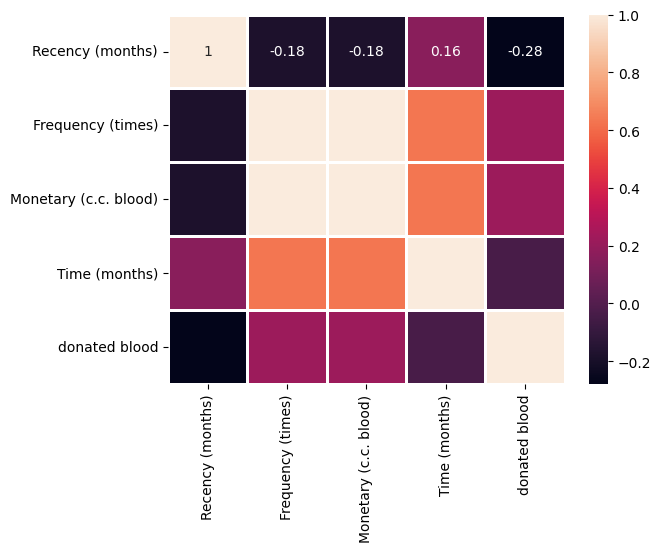

In [418]:
# Checking correlation

corr = df.corr(numeric_only = True)
sns.heatmap(corr, linewidths=1, annot=True)
plt.show()

In [419]:
# There is a multicollinearity between Monetary and Frequency features, so one should be removed

In [420]:
# removing Frequency column
del df['Frequency (times)']

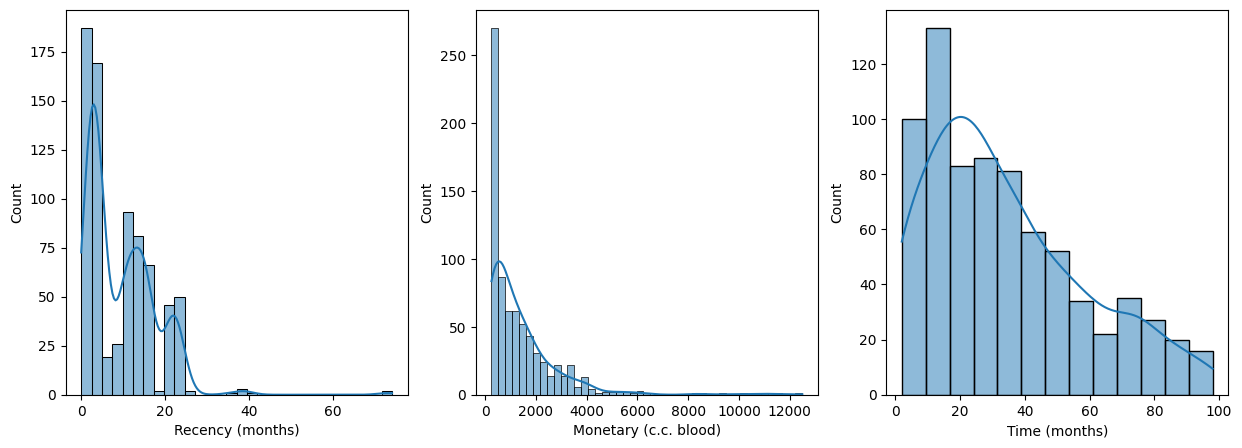

In [421]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data = df, x = 'Recency (months)', kde = True, ax=ax1)
sns.histplot(data = df, x = 'Monetary (c.c. blood)', kde = True, ax=ax2)
sns.histplot(data = df, x = 'Time (months)', kde = True, ax=ax3)

plt.show()

In [422]:
df.describe()

,Recency (months),Monetary (c.c. blood),Time (months),donated blood
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,1378.676471,34.282086,0.237968
std,8.095396,1459.826781,24.376714,0.426124
min,0.000000,250.000000,2.000000,0.000000
25%,2.750000,500.000000,16.000000,0.000000
50%,7.000000,1000.000000,28.000000,0.000000
75%,14.000000,1750.000000,50.000000,0.000000
max,74.000000,12500.000000,98.000000,1.000000


In [423]:
# Scaling features

# Create a RobustScaler instance
scaler = RobustScaler()

# Define the columns you want to scale
columns_to_scale = ['Recency (months)', 'Monetary (c.c. blood)', 'Time (months)']

# Use the scaler to transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [424]:
# Train / Test split

X = df.iloc[:, :-1]  # Features: All columns except the last
y = df.iloc[:, -1]   # Target: Last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

In [425]:
# cheking target feature balance

y_train.value_counts(normalize = True)

donated blood
0    0.762906
1    0.237094
Name: proportion, dtype: float64

In [426]:
# Resampling

smote = SMOTE(random_state=42)

# Train / Test split
X_train, y_train = smote.fit_resample(X_train, y_train)

In [427]:
## HyperParameter Optimization

params={
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'subsample': [0.1, 0.5, 0.7, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0]
    }
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='f1_micro',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

# defining best parameters
best_params = random_search.best_estimator_.get_params()
best_params = {k: v for k, v in best_params.items() if v is not None}
best_params

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'objective': 'binary:logistic',
 'colsample_bytree': 1.0,
 'enable_categorical': False,
 'learning_rate': 0.01,
 'max_depth': 14,
 'missing': nan,
 'n_estimators': 500,
 'subsample': 0.5}

In [428]:
# Define the XGBClassifier model
model = xgboost.XGBClassifier(random_state=42, **best_params)

# Fit the model
model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

# Make predictions on the test set
predictions = model.predict(X_test)

Cross-validation scores:  [0.71875    0.8        0.84375    0.86163522 0.83647799]
Mean cross-validation score:  0.8121226415094339


In [429]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
cm

,0,1
0,134,37
1,22,32


In [430]:
# Finding precision and recall
accuracy = accuracy_score(y_test, predictions)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, predictions)
print("Precision :", precision)
recall = recall_score(y_test, predictions)
print("Recall    :", recall)
F1_score = f1_score(y_test, predictions)
print("F1-score  :", F1_score)

Accuracy   : 0.7377777777777778
Precision : 0.463768115942029
Recall    : 0.5925925925925926
F1-score  : 0.5203252032520325


### Conclusion:

The Xgboost classifier achieved a mean cross-validation score of 81% and an accuracy of 0.73 on the testing set. This means that the classifier correctly predicted whether a donor donated blood or not in 73% of the cases. The confusion matrix showed that the classifier had more false negatives than false positives, which means that it tended to miss some potential donors who actually donated blood. The precision, recall and F1-score of the classifier were 0.46, 0.59 and 0.52 respectively, indicating that the classifier had a low ability to identify positive cases (donors) among all predicted cases.

The feature importance plot showed that the most important feature for the classifier was Recency, followed by Frequency, Time and  Total blood donated in c.c. This suggests that the recency of the last donation was the most influential factor in determining whether a donor would donate blood again or not. The frequency and time of donations also had some impact, while the monetary value of donations had the least impact.

The results of this project demonstrate that the RFMTC model can be applied to donor segmentation and prediction using machine learning techniques such as Xgboost. However, the performance of the classifier can be improved by tuning the parameters, using more features or applying different algorithms. Further research is needed to explore the best ways to optimize the RFMTC model for donor behavior analysis and marketing strategies.